# Optimizing the Flows in  Warehouse
## Q-Learning AI solution

A	B	C	D
E	F	G	H
I	J	K	L
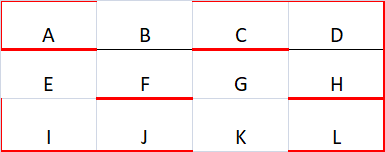

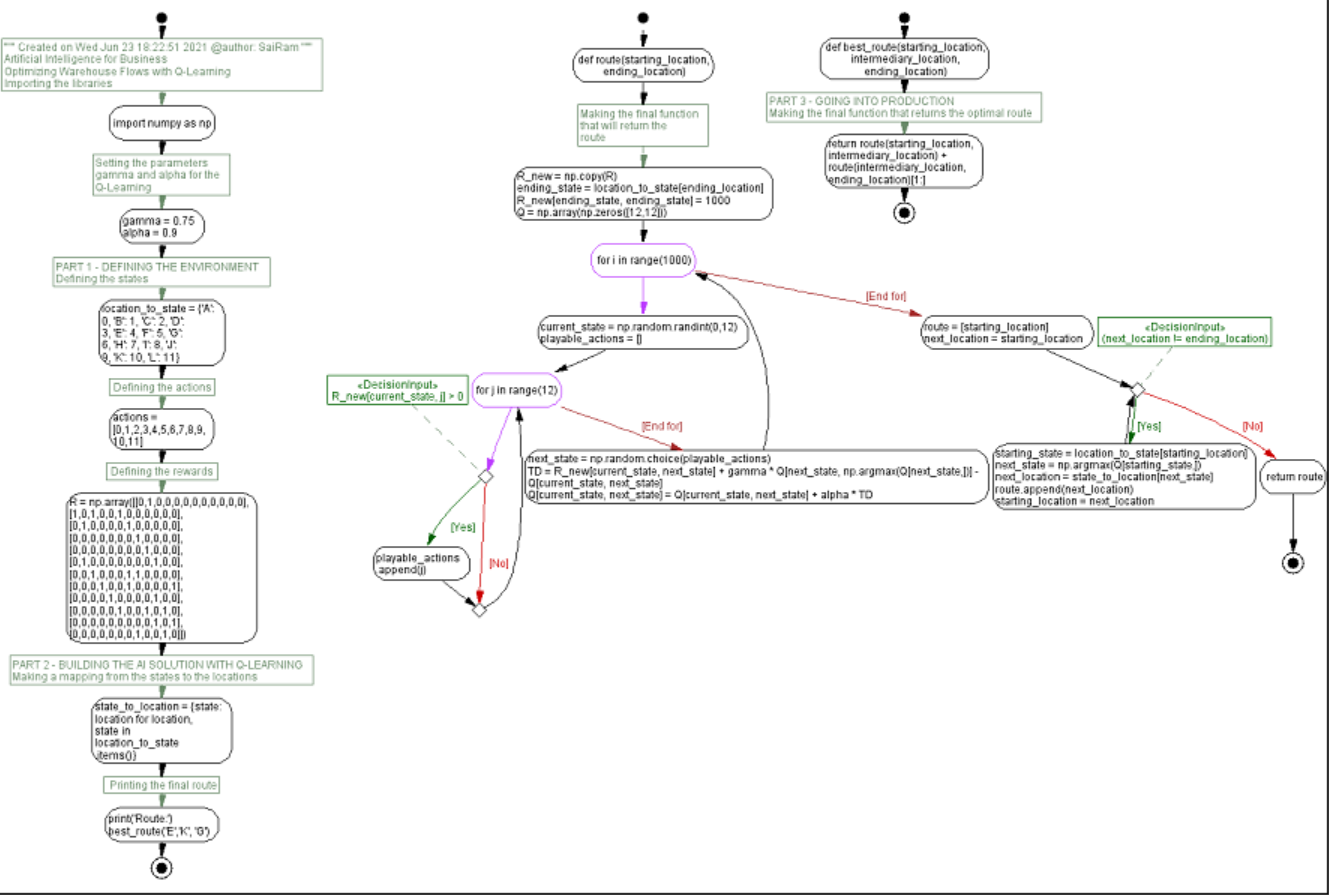

In [1]:
# Artificial Intelligence for Business
# Optimizing Warehouse Flows with Q-Learning
# Importing the libraries
import numpy as np

In [2]:
# Setting the parameters gamma and alpha for the Q-Learning
gamma = 0.75
alpha = 0.9

In [3]:
# PART 1 - DEFINING THE ENVIRONMENT
# Defining the states
location_to_state = {'A': 0,
                     'B': 1,
                     'C': 2,
                     'D': 3,
                     'E': 4,
                     'F': 5,
                     'G': 6,
                     'H': 7,
                     'I': 8,
                     'J': 9,
                     'K': 10,
                     'L': 11}

In [4]:
# Defining the actions
actions = [0,1,2,3,4,5,6,7,8,9,10,11]

In [5]:
#Defining the rewards
R = np.array([[0,1,0,0,0,0,0,0,0,0,0,0],
              [1,0,1,0,0,1,0,0,0,0,0,0],
              [0,1,0,1,0,0,1,0,0,0,0,0],
              [0,0,1,0,0,0,0,1,0,0,0,0],
              [0,0,0,0,0,1,0,0,1,0,0,0],
              [0,1,0,0,1,0,1,0,0,0,0,0],
              [0,0,0,0,0,1,0,1,0,0,1,0],
              [0,0,0,1,0,0,1,0,0,0,0,0],
              [0,0,0,0,1,0,0,0,0,1,0,0],
              [0,0,0,0,0,0,0,0,1,0,1,0],
              [0,0,0,0,0,0,1,0,0,1,0,1],
              [0,0,0,0,0,0,0,0,0,0,1,0]])

In [6]:
# PART 2 - BUILDING THE AI SOLUTION WITH Q-LEARNING

# Making a mapping from the states to the locations
state_to_location = {state: location for location, state in location_to_state.items()}

In [7]:
# Making the final function that will return the route
def route(starting_location, ending_location):
    R_new = np.copy(R)
    ending_state = location_to_state[ending_location]
    R_new[ending_state, ending_state] = 1000
    Q = np.array(np.zeros([12,12]))
    for i in range(1000):
        current_state = np.random.randint(0,12)
        playable_actions = []
        for j in range(12):
            if R_new[current_state, j] > 0:
                playable_actions.append(j)
        next_state = np.random.choice(playable_actions)
        TD = R_new[current_state, next_state] + gamma * Q[next_state, np.argmax(Q[next_state,])] - Q[current_state, next_state]
        Q[current_state, next_state] = Q[current_state, next_state] + alpha * TD
    route = [starting_location]
    next_location = starting_location
    while (next_location != ending_location):
        starting_state = location_to_state[starting_location]
        next_state = np.argmax(Q[starting_state,])
        next_location = state_to_location[next_state]
        route.append(next_location)
        starting_location = next_location
    return route

In [8]:
# PART 3 - GOING INTO PRODUCTION
# Making the final function that returns the optimal route
def best_route(starting_location, intermediary_location, ending_location):
    return route(starting_location, intermediary_location) + route(intermediary_location, ending_location)[1:]


In [12]:
# Printing the final route
print('Route:')
best_route('E','K', 'G')

Route:


['E', 'I', 'J', 'K', 'G']

In [11]:
route('E','D')

['E', 'F', 'B', 'C', 'D']

A	B	C	D
E	F	G	H
I	J	K	L
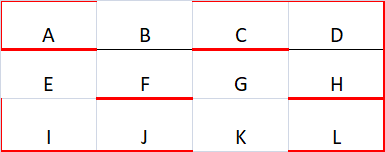